In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
df = df.iloc[:, [3,4]].values


In [40]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

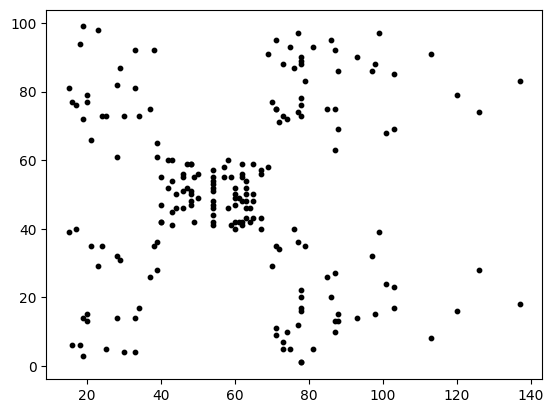

In [41]:
plt.scatter(df[:, 0], df[:,1], s=10, c = 'black')

In [42]:
from sklearn.cluster import KMeans

In [43]:
km = KMeans()
wcss = []


Text(0, 0.5, 'WCSS')

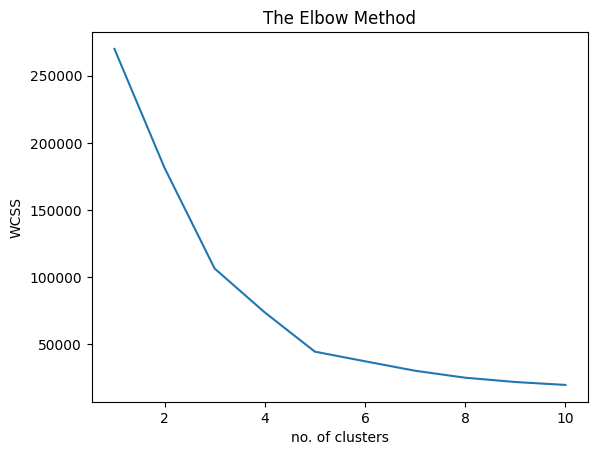

In [44]:
for i in range(1,11):
    km = KMeans(n_clusters=i,
    init = 'k-means++', max_iter=300, n_init=10)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")


In [45]:
from sklearn.cluster import DBSCAN


In [46]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [47]:
labels = dbscan.fit_predict(df)

In [48]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

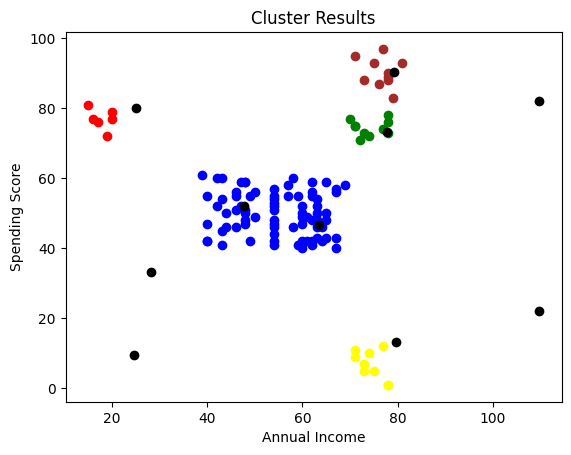

In [52]:
plt.scatter(df[labels==0,0], df[labels==0,1],  c= "red")
plt.scatter(df[labels==1,0], df[labels==1,1], c= "blue")
plt.scatter(df[labels==2,0], df[labels==2,1], c= "green")
plt.scatter(df[labels==3,0], df[labels==3,1], c= "yellow")
plt.scatter(df[labels==4,0], df[labels==4,1], c= "brown")
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],  c= "black")
plt.title("Cluster Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()